In [206]:
import numpy as np
from numpy.linalg import eigvals
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# I. Getting to know the Data

In [207]:
rawData = pd.read_csv("autism_screening.csv")
rawData

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,...,f,White-European,no,no,Russia,no,7.0,18 and more,Self,YES
700,1,0,0,0,0,0,0,1,0,1,...,m,Hispanic,no,no,Mexico,no,3.0,18 and more,Parent,NO
701,1,0,1,1,1,0,1,1,0,1,...,f,?,no,no,Russia,no,7.0,18 and more,?,YES
702,1,0,0,1,1,0,1,0,1,1,...,m,South Asian,no,no,Pakistan,no,6.0,18 and more,Self,NO


In [208]:
numData = rawData.select_dtypes(exclude="object")
numData.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'result'],
      dtype='object')

Ok, so our numerical variables include the AQ10 components, age, and result (AQ10 score) - a summation of A1-A10 scores.
We're mainly concerned with age and result, though.

In [209]:
catData = rawData.select_dtypes(include="object")
catData.columns

Index(['gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res',
       'used_app_before', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [210]:
catData

,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,age_desc,relation,Class/ASD
0,f,White-European,no,no,United States,no,18 and more,Self,NO
1,m,Latino,no,yes,Brazil,no,18 and more,Self,NO
2,m,Latino,yes,yes,Spain,no,18 and more,Parent,YES
3,f,White-European,no,yes,United States,no,18 and more,Self,NO
4,f,?,no,no,Egypt,no,18 and more,?,NO
...,...,...,...,...,...,...,...,...,...
699,f,White-European,no,no,Russia,no,18 and more,Self,YES
700,m,Hispanic,no,no,Mexico,no,18 and more,Parent,NO
701,f,?,no,no,Russia,no,18 and more,?,YES
702,m,South Asian,no,no,Pakistan,no,18 and more,Self,NO


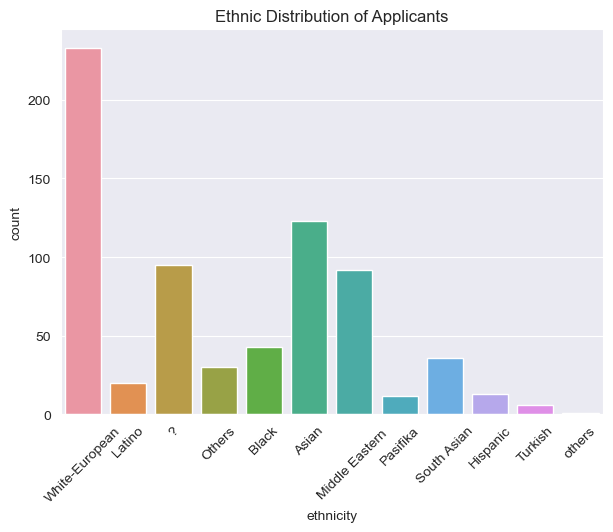

In [211]:
plt.figure(figsize=(7, 5))
sns.countplot(rawData, x="ethnicity")
plt.xticks(rotation=45)
plt.title("Ethnic Distribution of Applicants")
plt.show()

# II. Elementary Transformations

In [212]:
for label in catData.columns.tolist():
    print(label, len(catData[label].unique()))

gender 2
ethnicity 12
jundice 2
austim 2
contry_of_res 67
used_app_before 2
age_desc 1
relation 6
Class/ASD 2


In [213]:
rawData["used_app_before"].value_counts()

no     692
yes     12
Name: used_app_before, dtype: int64

So, among our categorical variables, we 5 binary variables:
* gender: sex defined as male/female, criterion ambiguous
* jundice: whether an applicant had **jaundice** at time of birth.
* austim: whether an application has an **autistic_family_member**, immediately speaking.
* used_app_before
* class/ASD: **diagnostic_status** of an applicant

It's important to note that age_desc holds only a single value, "18 or more", which does not vary with target class.

We'll impliment these transformations in the separate script, *cleaning.py*.

In [214]:
MR = pd.read_csv("autism_screening_MR.csv")
MR.corr()["diagnostic_status"].sort_values(ascending=False)

diagnostic_status         1.000000
result                    0.821445
A9_Score                  0.635576
A6_Score                  0.592091
A5_Score                  0.537004
A4_Score                  0.469945
A3_Score                  0.441074
A10_Score                 0.385917
A7_Score                  0.351429
A2_Score                  0.311382
A1_Score                  0.297628
A8_Score                  0.237161
autistic_family_member    0.177415
jaundice                  0.102152
age                       0.059200
used_app_before           0.044038
Unnamed: 0                0.039737
isMale                   -0.080378
Name: diagnostic_status, dtype: float64

Since the total AQ Score (result) is more highly correlated with an ASD diagnosis (diagnostic_status), and encapsulates the components scores, we'll be dropping individual components from consideration.

In [215]:
# Drop false index, AQ component scores.
MR = MR.drop(axis=1, labels=numData.columns.tolist()[:10]).drop(axis=1, labels="Unnamed: 0")
MR = MR[MR["age"] <= 100].dropna()
MR

,age,result,isMale,jaundice,autistic_family_member,used_app_before,diagnostic_status
0,26.0,6.0,0,0,0,0,0
1,24.0,5.0,1,0,1,0,0
2,27.0,8.0,1,1,1,0,1
3,35.0,6.0,0,0,1,0,0
4,40.0,2.0,0,0,0,0,0
...,...,...,...,...,...,...,...
699,25.0,7.0,0,0,0,0,1
700,34.0,3.0,1,0,0,0,0
701,24.0,7.0,0,0,0,0,1
702,35.0,6.0,1,0,0,0,0


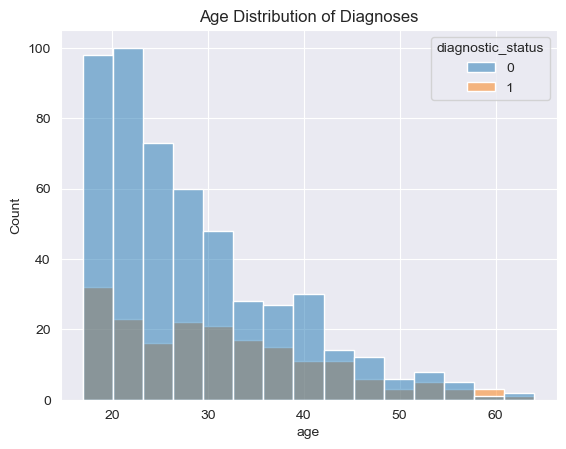

In [216]:
ax = plt.axes()
sns.histplot(MR, x="age", hue="diagnostic_status", ax=ax)
ax.set_title("Age Distribution of Diagnoses")
plt.show()

From a rough visual inspection, we can see roughly 1/3 of applicants in each age group will get ASD diagnoses. It becomes increasingly likely a diagnosis will be given as time passes. Let's calculate the portion of applicants to get an affirmative diagnosis:

In [217]:
print(str(round(len(MR[MR["diagnostic_status"] == 1]) / len(MR) * 100, 2)) + " %")

26.96 %


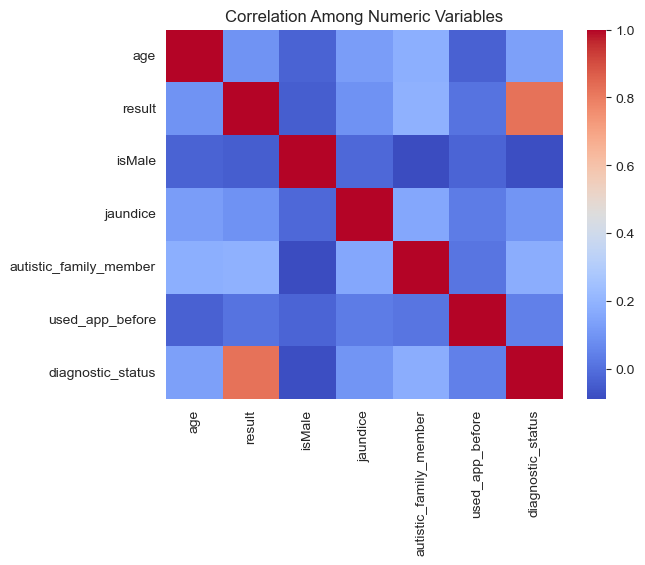

In [218]:
ax = plt.axes()
sns.heatmap(MR.corr(), ax = ax, cmap ="coolwarm")
ax.set_title("Correlation Among Numeric Variables")
plt.show()

# III. Variance Retention and Dimension Reduction

In [219]:
messyData = pd.DataFrame()
messyData["ethnicity"] = rawData["ethnicity"]
messyData["contry_of_res"] = rawData["contry_of_res"]
messyData["relation"] = rawData["relation"]

dummies = pd.get_dummies(messyData)
dummies

,ethnicity_?,ethnicity_Asian,ethnicity_Black,ethnicity_Hispanic,ethnicity_Latino,ethnicity_Middle Eastern,ethnicity_Others,ethnicity_Pasifika,ethnicity_South Asian,ethnicity_Turkish,...,contry_of_res_United Kingdom,contry_of_res_United States,contry_of_res_Uruguay,contry_of_res_Viet Nam,relation_?,relation_Health care professional,relation_Others,relation_Parent,relation_Relative,relation_Self
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
700,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
701,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
702,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [220]:
s = dummies.cov()
v = eigvals(s)
v[0:13].sum() / v.sum()

0.8151168587869353

13 PCs (representing combinations of relation, ethinicity, adn country of residence) explain ~80% of the variance from our dummy matrix. Rather than expanding consideration at the expense of interpretability, we'll simply drop them from consideration for the time being.

# IV. Model Building

In [221]:
MR

X = MR.drop(axis=1, labels="diagnostic_status")
y = MR["diagnostic_status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [222]:
logr = LogisticRegression().fit(X_train, y_train)
logr.score(X_train, y_train)

1.0

In [223]:
preds = logr.predict(X_test)
confusion_matrix(y_test, preds)

array([[133,   0],
       [  0,  43]], dtype=int64)

By reducing the number of variables under consideration to a smaller, more correlated set, and encoding them logically, we were able to accurately predict diagnostic_status (Class/ASD) with no falsities!